In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
tags = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","class"]

In [3]:
# Read the dataset frame
df = pd.read_csv('./kddcup.data_10_percent.txt', names=tags)

In [4]:
classtype = {'normal.': 0, 'back.': 1, 'buffer_overflow.': 3, 'ftp_write.': 2,
             'guess_passwd.': 2, 'imap.': 2, 'ipsweep.': 4,'land.': 1, 'loadmodule.': 3,
             'multihop.': 2, 'neptune.': 1, 'nmap.': 4, 'perl.': 3, 'phf.': 2, 'pod.': 1,
             'portsweep.': 4, 'rootkit.': 3, 'satan.': 4, 'smurf.': 1, 'spy.': 2,
             'teardrop.': 1, 'warezclient.': 2, 'warezmaster.': 2}

df['class'] = df['class'].replace(classtype)

In [5]:
display(df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0


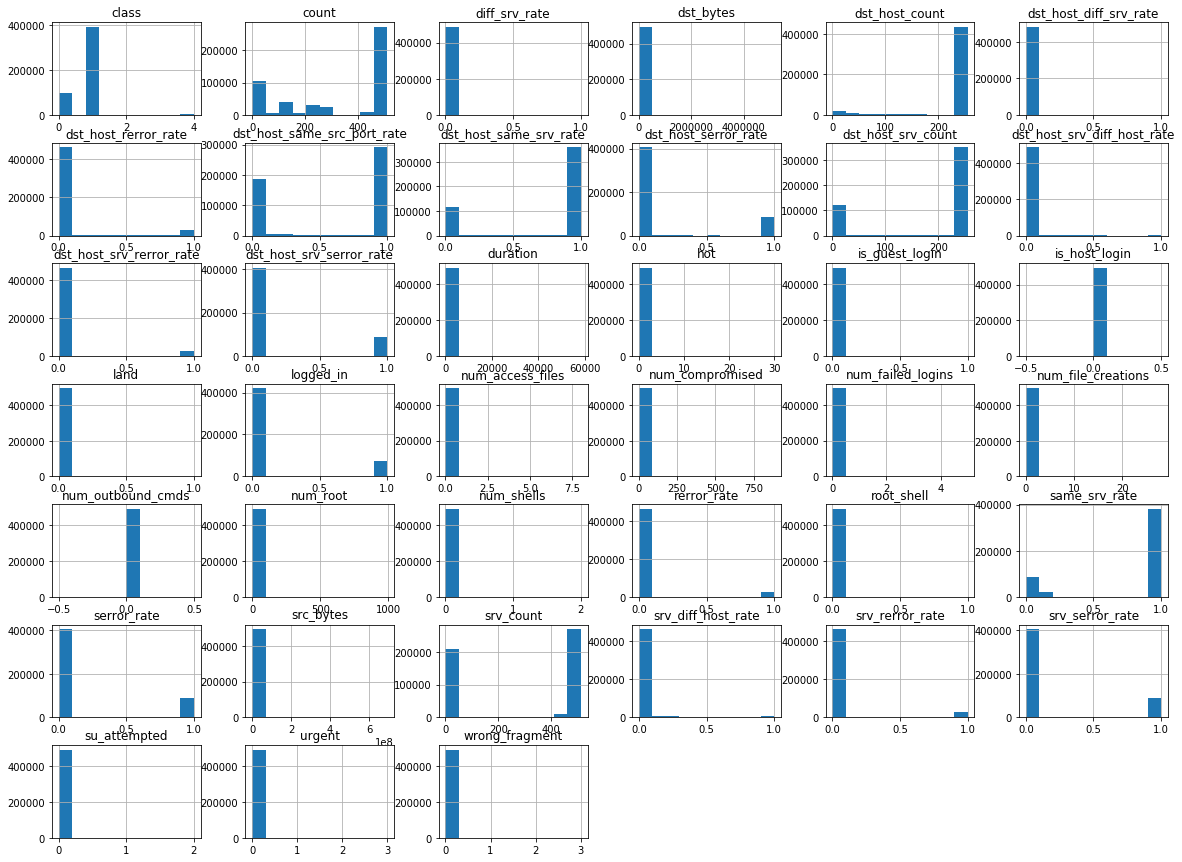

In [7]:
import seaborn as sns
df[tags].hist(figsize=(20,15))
print()

In [11]:
##### Feature transformation #####

# using one hot to discrete the string value
df_oh = pd.get_dummies(df, prefix=['protocol_type', 'service', 'flag'], columns=['protocol_type', 'service', 'flag'])
display(df_oh)
# df_oh = pd.get_dummies(df, prefix=['class'], columns=['class'])

fc = df_oh.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
494016,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
494017,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
494018,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
display(df_oh)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_0,class_1,class_2,class_3,class_4
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,1,0,0,0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,1,0,0,0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,1,0,0,0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,1,0,0,0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,0.05,0.00,0.01,0.0,0.0,1,0,0,0,0
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,0.05,0.00,0.01,0.0,0.0,1,0,0,0,0
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,0.05,0.06,0.01,0.0,0.0,1,0,0,0,0
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,0.05,0.04,0.01,0.0,0.0,1,0,0,0,0


Text(0.5, 1, 'Feature Correlation')

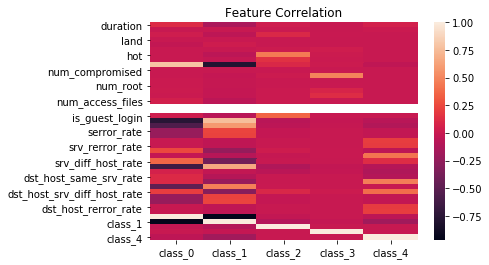

In [9]:
import seaborn as sns;

ax = sns.heatmap(fc.filter(['class_0', 'class_1', 'class_2', 'class_3', 'class_4']))

ax.set_title('Feature Correlation')

In [10]:
class_n = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4']
for cls in class_n:
    print(cls, ':')
    for idx, val in enumerate(fc[cls]):
        if abs(val) > 0.3 and fc.index.values[idx] not in class_n:
            print('{0:30s}{1:<8f}'.format(fc.index.values[idx], val))
    print("\n")
    
## pick logged_in, count, dst_host_same_src_port_rate, dst_host_count, srv_count   

class_0 :
logged_in                     0.795280
count                         -0.752977
srv_count                     -0.566828
srv_diff_host_rate            0.364681
dst_host_count                -0.642107
dst_host_same_src_port_rate   -0.481456


class_1 :
logged_in                     -0.784105
count                         0.762797
srv_count                     0.586432
srv_diff_host_rate            -0.384783
dst_host_count                0.663589
dst_host_same_src_port_rate   0.472173
dst_host_srv_diff_host_rate   -0.301628


class_2 :
hot                           0.449503
is_guest_login                0.356408


class_3 :
root_shell                    0.486117


class_4 :
diff_srv_rate                 0.427723
dst_host_diff_srv_rate        0.468716
dst_host_srv_diff_host_rate   0.396991




In [11]:
# choosed feature
cf = ['logged_in', 'count', 'dst_host_same_src_port_rate', 'dst_host_count', 'srv_count']
x = df_oh.loc[:,cf].values
y = df['class'].values

In [12]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 3, shuffle = True)
kf.get_n_splits(x, y)

for train_index, test_index in kf.split(x, y):
    print("TRAIN:\n", train_index, "\nTEST:\n", test_index, "\n\n")
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN:
 [     0      2      3 ... 494016 494017 494019] 
TEST:
 [     1      6      8 ... 494012 494013 494018] 


TRAIN:
 [     1      5      6 ... 494014 494018 494019] 
TEST:
 [     0      2      3 ... 494015 494016 494017] 


TRAIN:
 [     0      1      2 ... 494016 494017 494018] 
TEST:
 [     5     10     12 ... 494010 494014 494019] 




In [13]:
######################################################
################# Try 3 Algorihm #####################
################# 1. Random Forest ###################
################# 2. Decision Tree ###################
################# 3. Naive Bayes   ###################
######################################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

class_type = ['normal', 'DOS', 'R2L', 'U2R', 'Probing']

i = 1

for train_index, test_index in kf.split(x, y):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("----- Test {} -----".format(i))
    i += 1
    
    ##### Create model #####
    classifier1 = RandomForestClassifier(n_estimators=200, bootstrap = True, max_features = 'sqrt')
    classifier2 = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
    classifier3 = GaussianNB(priors=None, var_smoothing=1e-09)

    ###### Fit on training data #####
    clf1 = classifier1.fit(X_train, y_train)
    clf2 = classifier2.fit(X_train, y_train)
    clf3 = classifier3.fit(X_train, y_train)

    ##### prediction #####
    pred1 = clf1.predict(X_test)
    pred2 = clf2.predict(X_test)
    pred3 = clf3.predict(X_test)

    #accuracy matrix
    ac1=100*accuracy_score(y_test,pred1)
    ac2=100*accuracy_score(y_test,pred2)
    ac3=100*accuracy_score(y_test,pred3)

    print("Accuracy:")
    print('{0:15s}: {1:<8f}'.format('Random Forest', ac1), '%')
    print("{0:15s}: {1:<8f}".format('Decision Tree', ac2), '%')
    print("{0:15s}: {1:<8f}".format("Naive Bayes", ac3), '%\n')

----- Test 1 -----
Accuracy:
Random Forest  : 98.978588 %
Decision Tree  : 98.960370 %
Naive Bayes    : 95.981758 %

----- Test 2 -----
Accuracy:
Random Forest  : 98.944575 %
Decision Tree  : 98.936073 %
Naive Bayes    : 95.939832 %

----- Test 3 -----
Accuracy:
Random Forest  : 98.932430 %
Decision Tree  : 98.950648 %
Naive Bayes    : 95.936796 %



In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

classifier = MLPClassifier()

clf = classifier.fit(X_train, y_train)

print(clf.score(X_train, y_train))

0.9871655123623413


In [39]:
parameters = {'max_iter': [200, 500, 1000, 1500, 2000], 
              'alpha': 10.0 ** -np.arange(2, 10, 2), 
              'hidden_layer_sizes': [10, 50, 100, 150, 200]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

0.9885197071781434
{'alpha': 1e-08, 'hidden_layer_sizes': 100, 'max_iter': 2000}


In [46]:
from sklearn.metrics import f1_score

print("----- f1 score -----\n")

def test_f1(true, pred):
    for index, value in enumerate(f1_score(true, pred, average=None)):
        print('{0:10} {1}'.format(class_type[index], value))
        
print("Random Forest:")
test_f1(y_test, pred1)
print("\nDecision Tree:")
test_f1(y_test, pred2)
print("\nNaive Bayes:")
test_f1(y_test, pred3)

----- f1 score -----

Random Forest:
normal     0.9742358342394588
DOS        0.995934365753372
R2L        0.6426116838487973
U2R        0.09523809523809525
Probing    0.760121898127993

Decision Tree:
normal     0.9737449291972674
DOS        0.9958067975232816
R2L        0.6415770609318996
U2R        0.09523809523809525
Probing    0.7558293004839419

Naive Bayes:
normal     0.907133329098647
DOS        0.9819235535220666
R2L        0.27547869054972207
U2R        0.0
Probing    0.2901259650548558


In [47]:
######################################################
################## Confusion Matrix ##################
######################################################
from sklearn.metrics import confusion_matrix

#for RandomForest
cm1=confusion_matrix(y_test,pred1)
print("Random Forest Confusion Matrix:\n", cm1)

#for decision tree
cm2=confusion_matrix(y_test,pred2)
print("Decision Tree Confusion Matrix:\n", cm2)

#for Naive Bayes
cm3=confusion_matrix(y_test,pred3)
print("Naive Bayes Confusion Matrix:\n", cm3)

Random Forest Confusion Matrix:
 [[ 32255    107     20      2     41]
 [   889 129586      0      0     11]
 [   185      0    187      0      3]
 [    17      0      0      1      0]
 [   445     51      0      0    873]]
Decision Tree Confusion Matrix:
 [[ 32285     94      4      1     41]
 [   938 129546      0      1      1]
 [   193      0    179      0      3]
 [    17      0      0      1      0]
 [   453     57      0      0    859]]
Naive Bayes Confusion Matrix:
 [[ 28562   2225   1011      1    626]
 [  1619 128767      2      0     98]
 [   142      0    223      0     10]
 [     9      0      8      0      1]
 [   215    797      0      0    357]]
